In [44]:
import subprocess
from astropy.table import Table
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from photutils import CircularAperture
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch
import pandas

In [17]:
imageName = '/data/mj1e16/kepler/cal/kplr2009114174833_ffi-cal.fits'

In [4]:
def alterDefault(defaultDir,valList,attributeList):
    
    with open(defaultDir+'/default.sex','r') as f:
        data  = f.read()
    for x in range(len(valList)):
        nameLoc = data.find(attributeList[x]) + len(attributeList[x])
        endLoc = data[nameLoc:].find('#') + nameLoc
        newData = data[:nameLoc] + ' '+str(valList[x])+' ' + data[endLoc:]
        data = newData
    
#     with open(defaultDir+'/default.sex','r') as f:
#         endData = f.read()
#     cname = 'CATALOG_NAME'
#     nameLoc = endData.find(cname) + len(cname)
#     endLoc = data[nameLoc:].find('#') + nameLoc
#     newData = data[:nameLoc] + '' + data[endLoc:]
    
    with open(defaultDir+'/default.sex','w') as f:
        f.write(data)

In [38]:
def sextractor(sextractoryDir,imagename,cataloguename,extension,imageDir='/home/mj1e16/keplerImages/'):
    os.chdir(sextractoryDir)
    subprocess.call(['sex',imagename+'[{}]'.format(extension)])
    assoc = Table.read(cataloguename,format='ascii.sextractor')

    os.chdir(imageDir)
    hdu_list = fits.open(imagename) # open image header
    imagedata = (hdu_list[extension].data) 
    
    fig, ax = plt.subplots(figsize=(10, 10))
    positions = (assoc['X_IMAGE'], assoc['Y_IMAGE'])
    apertures = CircularAperture(positions, r=4.)
    norm = ImageNormalize(stretch=SqrtStretch())
    ax.imshow(imagedata, cmap='Greys', origin='lower',norm=norm,vmin=0,vmax=2000)
    apertures.plot(color='blue', lw=1.5, alpha=0.5)
    #plt.savefig('fits.png',dpi=100)
    plt.show()
    
#     print(len(assoc))
#     mags = assoc['MAG_APER']
#     plt.hist(mags,bins='auto')
#     plt.show()
    return assoc

In [40]:
alterDefault('/home/mj1e16/sextractor/sextractor-master/config/',[10,10,64,3],['DETECT_THRESH','DETECT_MINAREA','BACK_SIZE','BACK_FILTERSIZE'])

In [41]:
os.chdir('/home/mj1e16/sextractor/sextractor-master/config/')
with open('default.sex','r') as f:
    default = f.read()
print(default)

# Default configuration file for SExtractor 2.12.4
# EB 2010-10-10
#
 
#-------------------------------- Catalog ------------------------------------
 
CATALOG_NAME     test.cat       # name of the output catalog
CATALOG_TYPE     ASCII_HEAD     # NONE,ASCII,ASCII_HEAD, ASCII_SKYCAT,
                                # ASCII_VOTABLE, FITS_1.0 or FITS_LDAC
PARAMETERS_NAME  default.param  # name of the file containing catalog contents
 
#------------------------------- Extraction ----------------------------------
 
DETECT_TYPE      CCD            # CCD (linear) or PHOTO (with gamma correction)
DETECT_MINAREA 10 # min. # of pixels above threshold

DETECT_THRESH 10 # <sigmas> or <threshold>,<ZP> in mag.arcsec-2
ANALYSIS_THRESH  1.5            # <sigmas> or <threshold>,<ZP> in mag.arcsec-2
 
FILTER           Y              # apply filter for detection (Y or N)?
FILTER_NAME      default.conv   # name of the file containing the filter
 
DEBLEND_NTHRESH  32             # Number of deblending sub

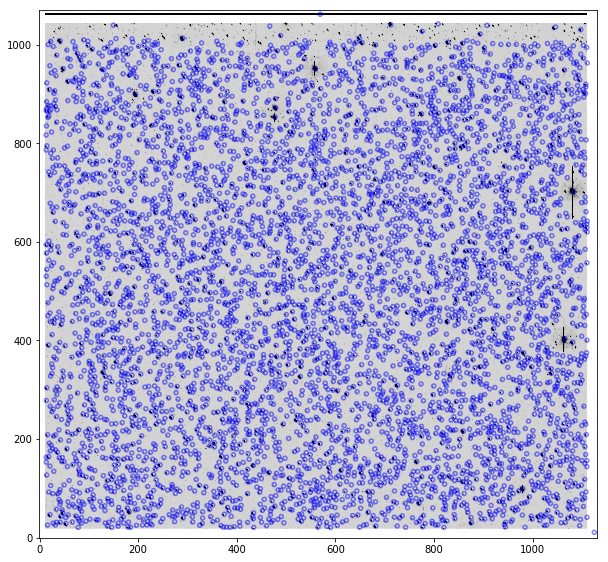

In [42]:
outTab = sextractor('/home/mj1e16/sextractor/sextractor-master/config/',imageName,'test.cat',1)

In [23]:
outTab

NUMBER,EXT_NUMBER,FLUX_ISO,FLUXERR_ISO,MAG_BEST,BACKGROUND,THRESHOLD,FLUX_MAX,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,FWHM_IMAGE,ELLIPTICITY
,,ct,ct,mag,ct,ct,ct,pix,pix,pix,pix,pix,
int64,int64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64
1,1,1452.084,13.64234,-7.2677,150.7649,19.69102,319.8578,985,21,985.0018,20.8663,4.93,0.32
2,1,2144.193,14.73541,-7.8337,147.9212,19.69102,830.3374,78,20,78.3653,20.5654,3.25,0.16
3,1,1341.911,13.64234,-7.2816,149.7721,19.69102,563.4769,236,21,235.6893,21.3837,0.83,0.101
4,1,849.3798,13.06155,-6.5402,150.2721,19.69102,253.0459,528,21,527.6812,21.4117,4.85,0.187
5,1,470.0296,12.4537,-6.3848,150.6785,19.69102,103.3161,847,21,846.313,21.4902,4.93,0.386
6,1,2136.021,12.4537,-8.3509,150.1062,19.69102,633.2499,390,21,389.6935,20.6942,1.77,0.256
7,1,2704.326,15.75282,-8.6166,150.11,19.69102,746.9141,386,21,386.2584,20.5985,1.78,0.197
8,1,3807.18,16.70839,-8.9787,150.1224,19.69102,1332.995,373,21,372.8022,21.1003,1.32,0.251


In [47]:
df = outTab.to_pandas()
newdf = df.nlargest(20,'FLUX_ISO')

In [53]:
a = newdf[10:20]
a = a['YPEAK_IMAGE']
b =newdf[10:20]['XPEAK_IMAGE']

In [69]:
x = newdf['Y_IMAGE'].tolist()
y = newdf['X_IMAGE'].tolist()
print(a)

[1061.5001, 701.3918, 403.0012, 951.0326, 99.1808, 871.9802, 899.2558, 852.8714, 1040.2107, 1013.0963, 931.85, 1007.7796, 495.9346, 154.1505, 1037.5251, 437.8054, 215.904, 52.4867, 335.5463, 1004.9517]


In [70]:
xpos = x[10:20]
ypos = y[10:20]

In [57]:
newdf

,NUMBER,EXT_NUMBER,FLUX_ISO,FLUXERR_ISO,MAG_BEST,BACKGROUND,THRESHOLD,FLUX_MAX,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,FWHM_IMAGE,ELLIPTICITY
2680,2681,1,429768500.0,320.23190,-21.5832,-9.220358,39.38204,103491.2,1089,1061,569.2671,1061.5001,0.00,0.996
4403,4404,1,40775630.0,192.89160,-19.0265,150.799100,39.38204,197485.8,1083,703,1083.1561,701.3918,40.21,0.924
3205,3206,1,30868390.0,133.20220,-18.7199,152.424600,39.38204,204874.0,1066,399,1065.6263,403.0012,0.00,0.942
3149,3150,1,15634960.0,155.29710,-17.9756,151.102100,39.38204,205551.6,559,952,559.6026,951.0326,0.00,0.818
832,833,1,7999469.0,72.93657,-17.2580,151.096300,39.38204,192867.9,980,98,980.1877,99.1808,13.86,0.777
3647,3648,1,7528662.0,64.95053,-17.1921,149.482600,39.38204,200720.0,479,871,478.9922,871.9802,0.00,0.738
3509,3510,1,7069382.0,92.27508,-17.1139,148.836400,39.38204,219046.1,195,899,194.8282,899.2558,0.00,0.592
3619,3620,1,5927462.0,91.93831,-16.9330,149.333400,39.38204,201337.0,478,853,477.9109,852.8714,14.52,0.648
2682,2683,1,5652782.0,248.79350,-16.8872,42.228270,39.38204,195588.2,713,1043,712.4908,1040.2107,0.00,0.516
3083,3084,1,4342997.0,146.19170,-16.5653,102.800200,39.38204,212017.9,290,1014,290.4898,1013.0963,0.00,0.394


In [74]:
os.chdir('/home/mj1e16/getpsf/PythonPhot/PythonPhot/')

In [90]:
files = os.listdir('/home/mj1e16/getpsf/PythonPhot/PythonPhot/')
files = [x for x in files if x[-3:]=='.py']
print(files)

['iterstat.py', 'getpsf.py', 'pkfit.py', 'cntrd.py', 'group.py', 'conftest.py', 'rebin.py', 'meanclip.py', 'hex2dec.py', 'pkfit_norecenter.py', 'newgetpsf.py', 'dao_value.py', 'measure_psf_simple.py', 'find.py', 'rdpsf.py', 'pixwt.py', 'mmm.py', 'pkfit_noise.py', '_astropy_init.py', 'pkfit_norecent_noise.py', 'rinter.py', 'djs_angle_match.py', 'make_2d.py', 'photfunctions.py', 'daoerf.py', 'aper.py', '__init__.py']


In [87]:
files = ['make_2d.py','daoerf.py', 'rinter.py', 'pkfit.py', 'pkfit_noise.py','rebin.py','dao_value.py','getpsf.py']

bigstring = ''
for filename in files:
    with open(filename,'r') as f:
        bigstring += f.read()+'\n\n'
with open('newgetpsf.py','w') as f:
    f.write(bigstring)

In [91]:
files = ['pixwt.py','mmm.py','aper.py']

bigstring = ''
for filename in files:
    with open(filename,'r') as f:
        bigstring += f.read()+'\n\n'
with open('newaper.py','w') as f:
    f.write(bigstring)

In [99]:
#import make_2d,daoerf, rinter, pkfit, pkfit_noise
import newgetpsf as getpsf
import newaper as aper
import numpy as np
# load FITS image and specify PSF star coordinates
from astropy.io import fits
fits_filename = '/data/mj1e16/kepler/cal/kplr2009114174833_ffi-cal.fits'
hdu = fits.open(fits_filename)
image = hdu[1].data
#xpos,ypos = np.array([1450,1400]),np.array([1550,1600])

# run aper to get mags and sky values for specified coords
mag,magerr,flux,fluxerr,sky,skyerr,badflag,outstr = \
    aper.aper(image,xpos,ypos,phpadu=1,apr=5,zeropoint=25,
    skyrad=[40,50],badpix=[-12000,60000],exact=True)

# use the stars at those coords to generate a PSF model
gauss,psf,psfmag = \
    getpsf.getpsf(image,xpos,ypos,
                  mag,sky,1,1,np.arange(len(xpos)),
                  5,2,'output_psf.fits')

WARNING [aper.py] - 10 star positions outside image


AttributeError: 'function' object has no attribute 'make_2d'